In [73]:
# Import the necessary libraries into the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset
marketing = pd.read_csv('marketing.csv')

#### Examining the data

In [74]:
print(marketing.head(5))

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [75]:
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [76]:
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null object
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null object
date_canceled          577 non-null object
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: object(12)
memory usage: 941.0+ KB
None


#### Updating the data type of a column

In [77]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [78]:
# Convert is_retained to boolean
print(marketing['is_retained'].astype('bool').head(5))

0    True
1    True
2    True
3    True
4    True
Name: is_retained, dtype: bool


By changing the data type to boolean, we can now sum the is_retained column to calculate the number of users who were retained.

#### Adding new columns

In [79]:
# Mapping for channels
channel_dict = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Email':4, 'Push':5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Add the new column is_correct_lang
np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

#### Date columns

Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.

In [80]:
# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Add a Day of the Week column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

#### Exploratory data analysis

We'll determine how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month. 

#### Daily marketing reach by channel

In [81]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


#### Visualizing daily marketing reach

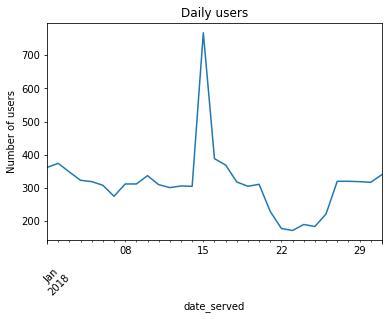

In [82]:
# Plot daily_subscriber
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

#### Calculating conversion rate

On marketing teams, conversion rate is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

As a reminder, conversion rate is the percentage of the users who saw our marketing assets and subsequently became subscribers.

The formula for conversion rate is: number of people who convert / total number of people who we market to. 

In [83]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribe
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total

print(round(conversion_rate*100, 2), '%')

13.89 %


#### Calculating retention rate

The next thing to do is to calculate the retention rate, or the number of remaining subscribers from the users who converted to your product. This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

The formula for rentention rate is: number of people who remain subscribed / total number of people who converted. 

In [84]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers

print(round(retention_rate*100, 2), '%')

66.8 %


#### Comparing language conversion rate

In [85]:
# Isolate English spakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total

print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [86]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total

print(language_conversion_rate)


language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


We can see that the conversion rate is much lower for English and Spanish compared to others. 

#### Aggregating by date

In [87]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total

print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


#### Visualize conversion rate by language

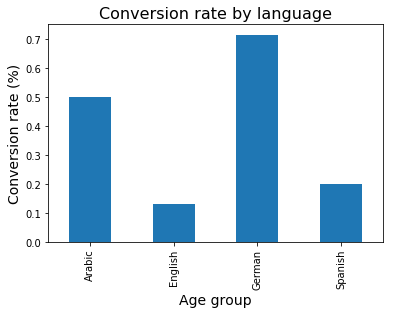

In [88]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

#Add a title and x and y-axis labels
plt.title('Conversion rate by language', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Age group', size = 14)

# Display the plot
plt.show()

#### Creating daily conversion rate DataFrame

To understand trends over time, we will create a new DataFrame that includes the conversion rate each day.

In [89]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

#### Setting up the data to visualize daily conversion

In [90]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

#### Visualize daily conversion rate

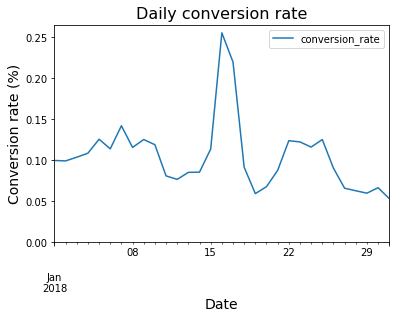

In [91]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

#### Marketing channels across age groups

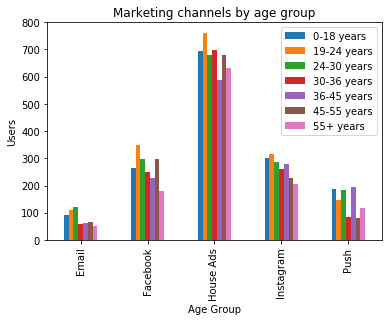

In [93]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

We can see that email is not reaching older age groups, and Facebook is not reaching many people under 18.

#### Grouping and counting by multiple columns

In order to see whose channel had the best retention rate from the campaign, we must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect the strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

In [94]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                    ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


#### Analyzing retention rates for the campaign

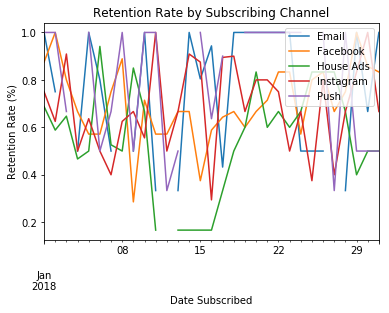

In [95]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

#### Building a conversion function

In [96]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

#### Test and visualize conversion function

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
             45-55 years    0.022222
             55+ years      0.086957
2018-01-02   0-18 years     0.180328
             19-24 years    0.164384
             24-30 years    0.114754
             30-36 years    0.040000
             36-45 years    0.043478
             45-55 years    0.043478
             55+ years      0.024390
2018-01-03   0-18 years     0.102041
             19-24 years    0.208955
             24-30 years    0.150943
             30-36 years    0.042553
             36-45 years    0.060000
             45-55 years    0.047619
             55+ years      0.043478
2018-01-04   0-18 years     0.117647
             19-24 years    0.200000
             24-30 years    0.183673
             30-36 years    0.045455
             36-45 years    0.043478
             

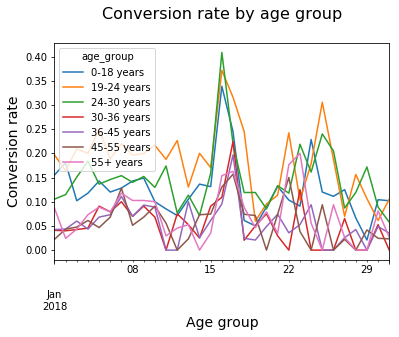

In [97]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [98]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily' + str(column) + 'conversion_rate', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        
        # Show plot
        plt.show()
        plt.clf()

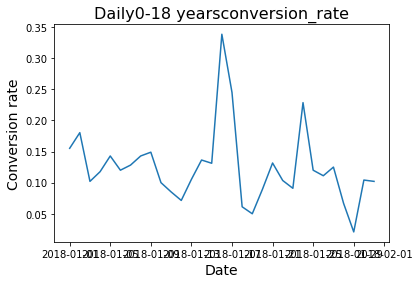

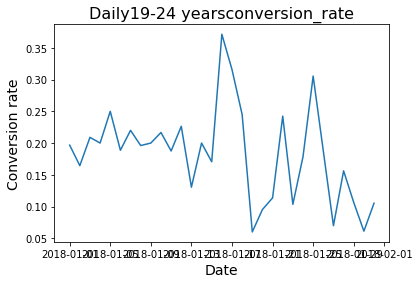

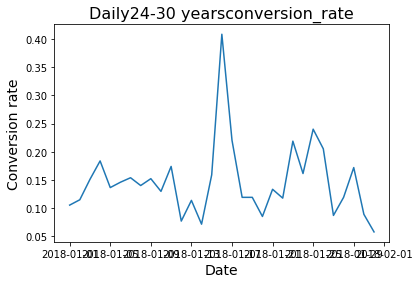

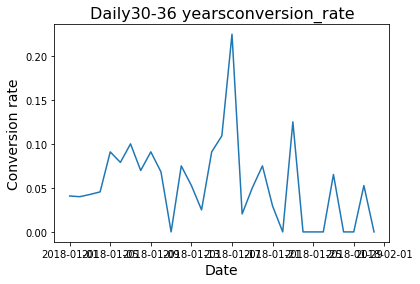

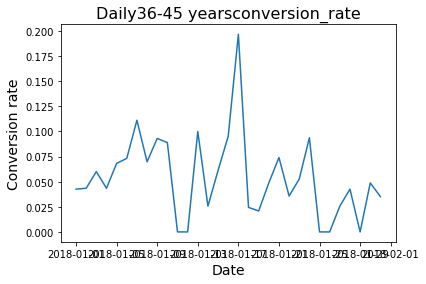

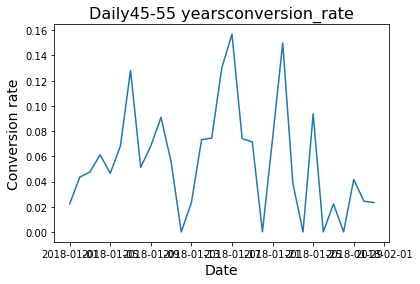

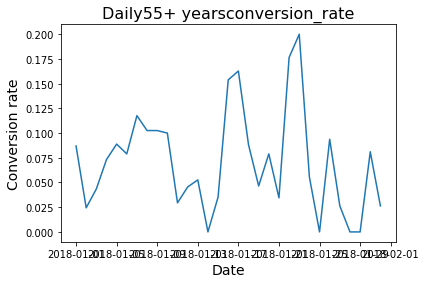

<Figure size 432x288 with 0 Axes>

In [99]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Plot the result
plotting_conv(age_group_df)

#### House ads conversion rate

In [100]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


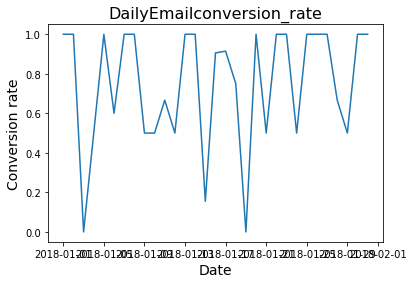

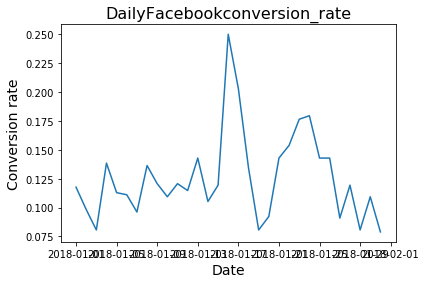

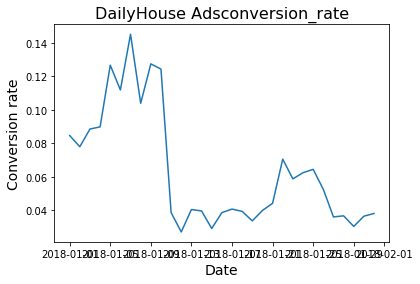

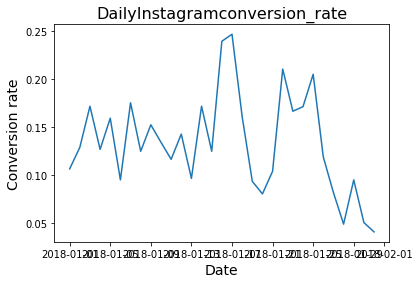

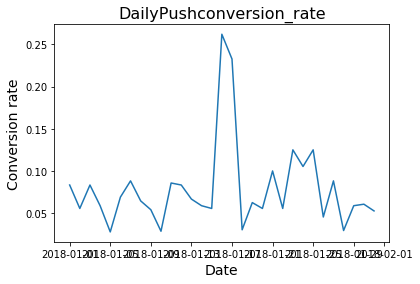

<Figure size 432x288 with 0 Axes>

In [101]:
# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

#### Analyzing House ads conversion rate

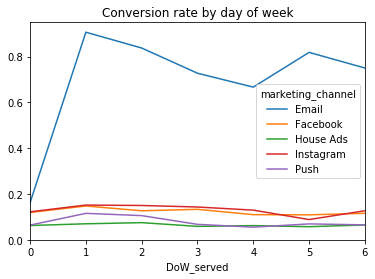

In [102]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week')
plt.ylim(0)
plt.show()

#### House ads conversion by language

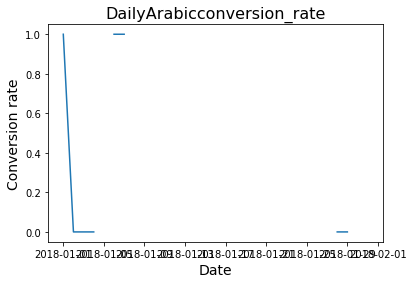

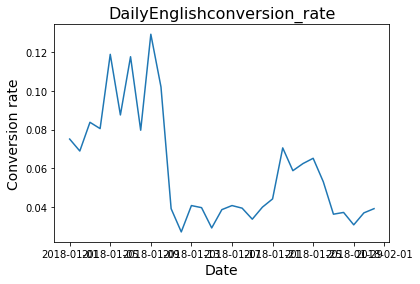

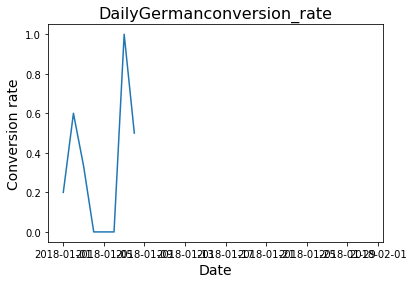

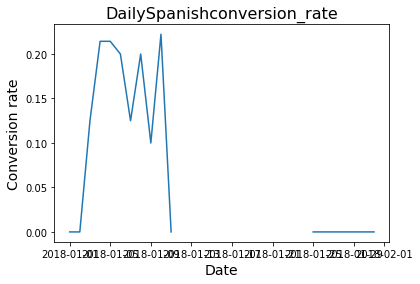

<Figure size 432x288 with 0 Axes>

In [103]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

The English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. We will investigate further.

#### Creating a DataFrame for house ads

In [104]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


We can see that the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. Let's investigate further.

#### Confirming house ads error

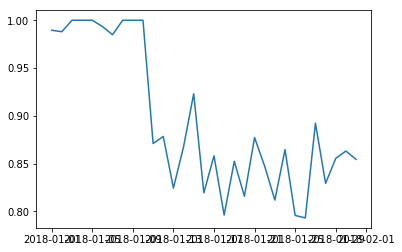

In [105]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()


#### Setting up conversion indexes

In [106]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324


#### Analyzing user preferences

In [111]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

converted

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0
            English                 200        14
            German                    5         3
            Spanish                  10         0
2018-01-03  Arabic                    2         0
            English                 179        15
            German                    3         1
            Spanish                   8         1
2018-01-04  Arabic                    2         0
            English                 149        12
            German                    2         0
            Spanish                  14         3
2018-01-05  English                 143        17
            German                    1     False
            Spanish                  14         3
2018-01-06  Arabic                    3         3
            English                 136        12
            German                    2         0
            Spanish                  11         2
2018-01-07  Arabic                    2         2
            English                 117        14
            German                    2         2
            Spanish                  10         1
2018-01-08  English                 138        11
            German                    6         3
            Spanish                  10         2
...                                 ...       ...
2018-01-24  German                    3         0
            Spanish                   8         0
2018-01-25  Arabic                    3         0
            English                  75         4
            German                    4         2
            Spanish                  11         0
2018-01-26  Arabic                    6         0
            English                  89         4
            German                    3         0
            Spanish                  16         2
2018-01-27  Arabic                    3         1
            English                 148         4
            German                    3         0
            Spanish                  12         1
2018-01-28  Arabic                    5         0
            English                 134         4
            German                    3         0
            Spanish                  21         2
2018-01-29  Arabic                    7         2
            English                 138         3
            German                    4         0
            Spanish                  15         0
2018-01-30  Arabic                    4         0
            English                 139         4
            German                    3         0
            Spanish                  18         2
2018-01-31  Arabic                    7         1
            English                 130         4
            German                    4         0
            Spanish                  16         1

[119 rows x 2 columns]

#### Test allocation

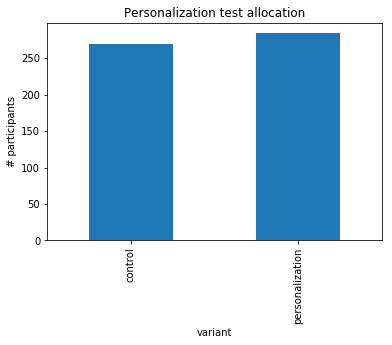

In [113]:
# Subset the dataframe
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

#### Comparing conversion rates

In [114]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


#### Creating a lift function

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift is: treatment conversion rate - control conversion rate / control conversion rate.

The result is the percent difference between the control and treatment.

In [115]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


#### Building A/B test segmenting function

In [120]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization))

In [122]:
## to be continued